In [15]:
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np
import requests
from io import BytesIO
from PIL import Image

In [4]:
model = ResNet50(weights='imagenet')








102858752/102853048 [==============================] - 70s 1us/step


In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [39]:
url_img='https://previews.123rf.com/images/cboswell/cboswell1310/cboswell131000104/22926077-this-chipmonk-is-finding-plenty-of-food-today.jpg'
response = requests.get(url_img)
img = Image.open( BytesIO(response.content) )
img = img.resize( (224,224))

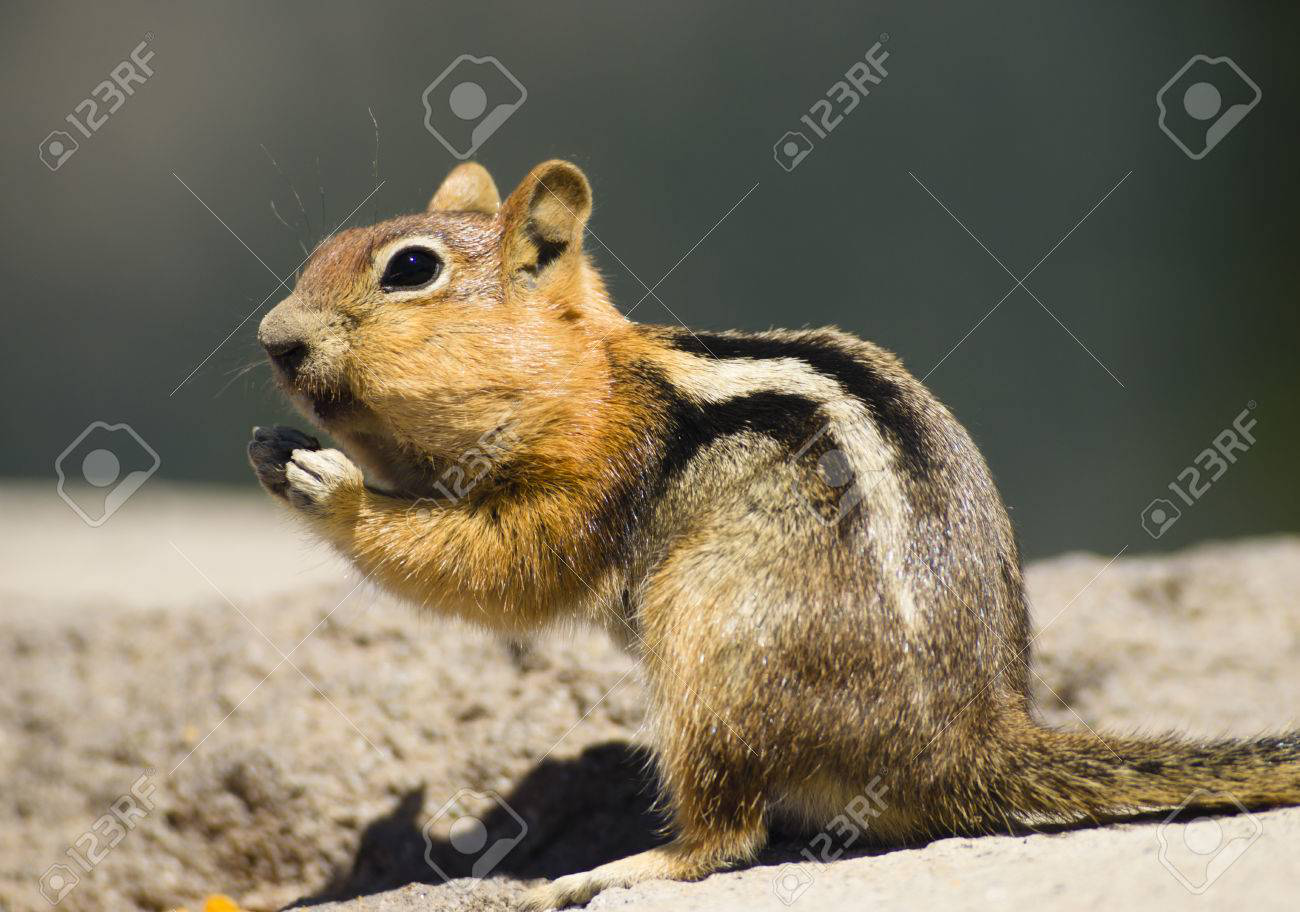

In [38]:
img

In [40]:
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X.shape

(1, 224, 224, 3)

In [34]:
y_pred = model.predict(X)

In [35]:
decode_predictions(y_pred, top=3)

[[('n02356798', 'fox_squirrel', 0.48617655),
  ('n03388043', 'fountain', 0.23897822),
  ('n02342885', 'hamster', 0.02808814)]]